# Projeto Final


## Alunos

Victor Jurdi

Lucas Ohara

In [89]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t


## Introdução

A ideia inicial do projeto consiste em, através de técnicas de regressão, realizar uma análise dos dados de atributos de jogadores do jogo FIFA 18 e tentar criar uma predição do valor dos jogadores em questão. Para isso, o software irá analisar uma série de características quantitativas que os players apresentam.

## Leitura e liempeza do Database

In [44]:
fifa = pd.read_csv("Fifa.csv")

fifa.head()

C:\Users\victo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
fifa1 = fifa.drop(columns=['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'ID', 'CAM',
        'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 
        'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM','RS', 'RW', 'RWB', 'ST'])
fifa1

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,1,30,93,93,€105M,€565K,92,48,90,95,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,92,94,€123M,€280K,94,56,96,82,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,92,92,€97M,€510K,88,78,86,60,...,83,87,38,77,89,45,80,84,88,ST
4,4,31,92,92,€61M,€230K,58,29,52,35,...,55,25,11,61,44,10,83,70,11,GK
5,5,28,91,91,€92M,€355K,79,80,78,80,...,83,88,19,83,79,42,84,78,87,ST
6,6,26,90,92,€64.5M,€215K,57,38,60,43,...,50,31,13,58,40,21,64,68,13,GK
7,7,26,90,91,€90.5M,€295K,93,54,93,91,...,86,79,22,87,79,27,65,86,79,LW
8,8,27,90,90,€79M,€340K,60,60,71,69,...,90,87,69,52,77,82,74,88,82,CDM CM
9,9,29,90,90,€77M,€275K,78,50,75,69,...,75,88,18,80,72,22,85,70,88,ST


In [92]:
fifa1.describe()

,Unnamed: 0,Age,Overall,Potential
count,17981.000000,17981.000000,17981.000000,17981.000000
mean,8990.000000,25.144541,66.247984,71.190813
std,5190.811931,4.614272,6.987965,6.102199
min,0.000000,16.000000,46.000000,46.000000
25%,4495.000000,21.000000,62.000000,67.000000
50%,8990.000000,25.000000,66.000000,71.000000
75%,13485.000000,28.000000,71.000000,75.000000
max,17980.000000,47.000000,94.000000,94.000000


In [93]:
fifa2=fifa1.dropna()

In [94]:
valores=[]
for e in fifa2['Value']:
    if 'M' in e:
        
        M=float(e.replace('M','')[1:])*1000000
        valores.append(M)
    elif 'K' in e:
        
        K=float(e.replace('K',"")[1:])*1000
        valores.append(K)
        
    else:
        a = float(e[1:])
        valores.append(a)

fifa2['Value1']=valores
    
fifa2.replace(fifa2['Value'],fifa2['Value1'])
    
fifa2.drop(columns=['Value'])

,Unnamed: 0,Age,Overall,Potential,Wage,Acceleration,Aggression,Agility,Balance,Ball control,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value1
0,0,32,94,94,€565K,89,63,89,63,93,...,94,23,91,92,31,80,85,88,ST LW,95500000.0
1,1,30,93,93,€565K,92,48,90,95,95,...,85,26,87,73,28,59,90,85,RW,105000000.0
2,2,25,92,94,€280K,94,56,96,82,95,...,80,33,90,78,24,53,80,83,LW,123000000.0
3,3,30,92,92,€510K,88,78,86,60,91,...,87,38,77,89,45,80,84,88,ST,97000000.0
4,4,31,92,92,€230K,58,29,52,35,48,...,25,11,61,44,10,83,70,11,GK,61000000.0
5,5,28,91,91,€355K,79,80,78,80,89,...,88,19,83,79,42,84,78,87,ST,92000000.0
6,6,26,90,92,€215K,57,38,60,43,42,...,31,13,58,40,21,64,68,13,GK,64500000.0
7,7,26,90,91,€295K,93,54,93,91,92,...,79,22,87,79,27,65,86,79,LW,90500000.0
8,8,27,90,90,€340K,60,60,71,69,89,...,87,69,52,77,82,74,88,82,CDM CM,79000000.0
9,9,29,90,90,€275K,78,50,75,69,85,...,88,18,80,72,22,85,70,88,ST,77000000.0


In [95]:
drop_row=fifa2[fifa2['Value1']==0].index
drop_row
fifa2.drop(drop_row,inplace=True)

In [97]:
colunas = ['Unnamed: 0','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Positions']

cols = [col for col in fifa2.columns if col not in colunas]

for i in cols:
    fifa2[i] = fifa2[i].apply(lambda x: eval(x) if isinstance(x,str) else x)


In [51]:
cor=fifa2.corr()

In [52]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]), #tamanho da fonte das variáveis
            
            dict(selector="td",
                 props=[('padding', "0em 0em")]), #tamanho dos retângulos  
            
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]), #tamanho da fonte das variáveis quando passsar o mouse sobre elas
            
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')]) #tamanho dos valores quando passar o mouse sobre eles
]

cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## Habilidades

In [53]:
attributes = pd.read_excel('Attributes.xlsx')

In [54]:
attributes.head(10)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [55]:
corr=attributes.corr()


In [56]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]), #tamanho da fonte das variáveis
            
            dict(selector="td",
                 props=[('padding', "0em 0em")]), #tamanho dos retângulos  
            
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]), #tamanho da fonte das variáveis quando passsar o mouse sobre elas
            
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')]) #tamanho dos valores quando passar o mouse sobre eles
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

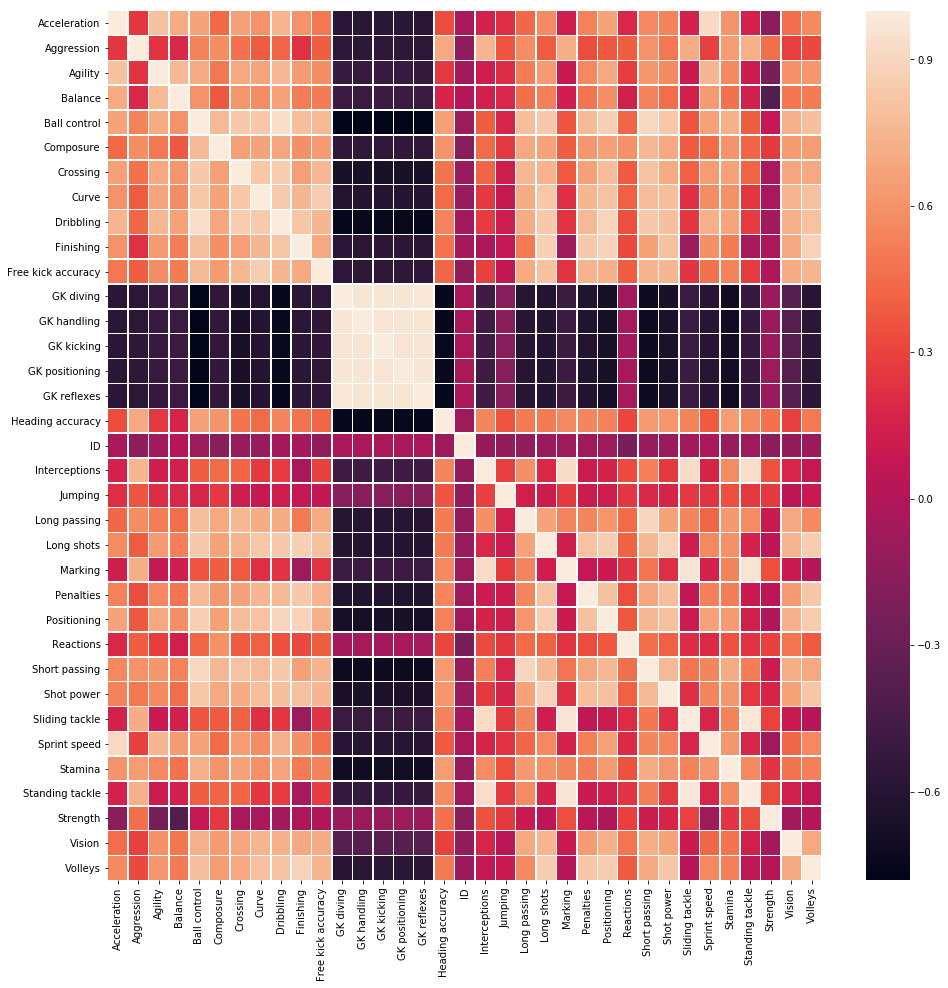

In [57]:
plt.figure(figsize= (16, 16))
sns.heatmap(corr, linewidth=0.5);

## Distribuição Valor

In [58]:
valor=fifa2['Value1']

In [59]:
fifa2.Value1.describe()

count    1.574100e+04
mean     2.522084e+06
std      5.494303e+06
min      1.000000e+04
25%      3.500000e+05
50%      7.500000e+05
75%      2.300000e+06
max      1.230000e+08
Name: Value1, dtype: float64

In [60]:
valor_min = fifa2.Value1.min()
valor_max = fifa2.Value1.max()

print('O jogador mais barato do jogo custa: €{:.2f}'.format(valor_min))
print('O jogador mais caro do jogo custa: €{:.2f}'.format(valor_max))

O jogador mais barato do jogo custa: €10000.00
O jogador mais caro do jogo custa: €123000000.00


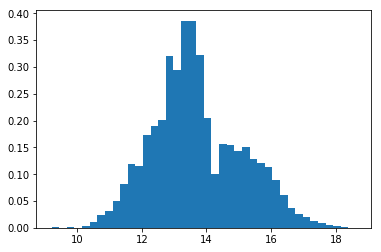

In [61]:
plt.hist(np.log(valor), density=True, bins= 40);

## Value x Overall

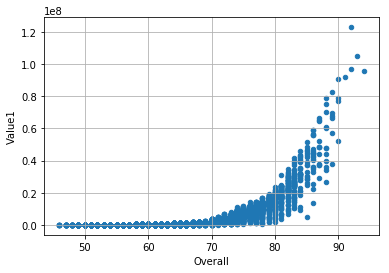

In [62]:
fifa2.plot.scatter(x="Overall",y="Value1");

plt.grid(True)

## Age x Value

In [63]:
np.corrcoef(fifa2.Age, fifa2.Value1)

array([[1.       , 0.0897609],
       [0.0897609, 1.       ]])

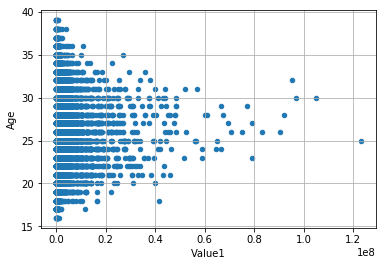

In [64]:
fifa2.plot.scatter(x="Value1",y="Age");

plt.grid(True)

## Modelo de Regressão

In [98]:
x = fifa2[['Age', 'Overall', 'Potential',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]
x.dtypes

Age                   int64
Overall               int64
Potential             int64
Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision              

In [99]:
y = fifa2.Value1

In [100]:
def regress(x,y):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    return results

In [101]:
results=regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Value1   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     434.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:06:01   Log-Likelihood:            -2.9415e+05
No. Observations:               17725   AIC:                         5.884e+05
Df Residuals:                   17687   BIC:                         5.887e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.867e+07    6.1e+05    -46.982      0.000   -2.99e+07   -2.75e+07
Age                -2.617e+05   1.38e+04    -18.924      0.000   -2.89e+05   -2.35e+05
Overall             5.331e+05   1.53e+04     34.935      0.000    5.03e+05    5.63e+05
Potential           7.159e+04    1.2e+04      5.970      0.000    4.81e+04    9.51e+04
Acceleration       -8099.1036   5609.022     -1.444      0.149   -1.91e+04    2895.129
Aggression         -9465.6480   3208.064     -2.951      0.003   -1.58e+04   -3177.528
Agility            -1.218e+04   4283.294     -2.845      0.004   -2.06e+04   -3788.766
Balance             4363.1376   3940.074      1.107      0.268   -3359.794    1.21e+04
Ball control        -4.56e+04   7343.839     -6.209      0.000      -6e+04   -3.12e+04
Composure            1.96e+04   4500.547      4.354      0.000    1.08e+04    2.84e+04
Crossing           -5254.8234   3963.092     -1.326      0.185    -1.3e+04    2513.226
Curve              -1123.1215   4140.308     -0.271      0.786   -9238.531    6992.288
Dribbling              -1e+04   5948.606     -1.681      0.093   -2.17e+04    1659.206
Finishing           1.096e+04   4818.146      2.274      0.023    1510.999    2.04e+04
Free kick accuracy  7555.1086   3687.944      2.049      0.041     326.376    1.48e+04
GK diving          -7398.5478   8706.646     -0.850      0.395   -2.45e+04    9667.334
GK handling        -6809.0105   8785.732     -0.775      0.438    -2.4e+04    1.04e+04
GK kicking          2471.3370   8048.921      0.307      0.759   -1.33e+04    1.82e+04
GK positioning     -2.356e+04   8637.285     -2.728      0.006   -4.05e+04   -6634.053
GK reflexes        -2.273e+04   8640.397     -2.631      0.009   -3.97e+04   -5792.993
Heading accuracy   -1.564e+04   4213.536     -3.712      0.000   -2.39e+04   -7383.411
Interceptions       6152.0830   4575.005      1.345      0.179   -2815.375    1.51e+04
Jumping             4955.1448   3070.327      1.614      0.107   -1062.997     1.1e+04
Long passing        1.305e+04   5072.153      2.572      0.010    3103.836     2.3e+04
Long shots         -1.673e+04   4496.544     -3.720      0.000   -2.55e+04   -7912.120
Marking            -6.474e+04   5787.800    -11.186      0.000   -7.61e+04   -5.34e+04
Penalties            769.3934   4006.695      0.192      0.848   -7084.123    8622.909
Positioning         8270.7584   4555.521      1.816      0.069    -658.509    1.72e+04
Reactions           4.712e+04   6288.123      7.494      0.000    3.48e+04    5.94e+04
Short passing      -1.164e+04   6834.371     -1.703      0.089    -2.5e+04    1755.031
Shot power         -1.691e+04   4231.252     -3.996      0.000   -2.52e+04   -8613.247
Sliding tackle      2.739e+04   6664.692      4.109      0.000    1.43e+04    4.05e+04
Sprint speed       -7733.8958   5252.5